In [12]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\GAURA\AppData\Roaming\nltk_data...


True

In [16]:
df = pd.read_csv("redmi6.csv", encoding='latin1')   # <-- replace with your file path if needed
print("Columns in dataset:", df.columns)
print(df.head())

Columns in dataset: Index(['Review Title', 'Customer name', 'Rating', 'Date', 'Category',
       'Comments', 'Useful'],
      dtype='object')
                                   Review Title             Customer name  \
0  Another Midrange killer Smartphone by Xiaomi         Rishikumar Thakur   
1                         vry small size mobile                   Raza ji   
2  Full display not working in all application.             Vaibhav Patel   
3                               Value for Money           Amazon Customer   
4                       Not worth for the money  Sudhakaran Wadakkancheri   

               Rating                  Date Category  \
0  4.0 out of 5 stars     on 1 October 2018  Display   
1  3.0 out of 5 stars  on 15 September 2018   Others   
2  3.0 out of 5 stars  on 18 September 2018   Others   
3  5.0 out of 5 stars  on 28 September 2018  Display   
4  2.0 out of 5 stars  on 18 September 2018   Others   

                                            Comments  \
0 

In [18]:
df['Comments'] = df['Comments'].astype(str)


In [19]:
sia = SentimentIntensityAnalyzer()


In [21]:
df['Sentiment_Score'] = df['Comments'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['Sentiment'] = df['Sentiment_Score'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

In [22]:
sentiment_counts = df['Sentiment'].value_counts()
print("\nSentiment Distribution:\n", sentiment_counts)



Sentiment Distribution:
 Sentiment
Positive    214
Negative     36
Neutral      30
Name: count, dtype: int64


C:\Users\GAURA\AppData\Local\Temp\ipykernel_1688\1482287402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


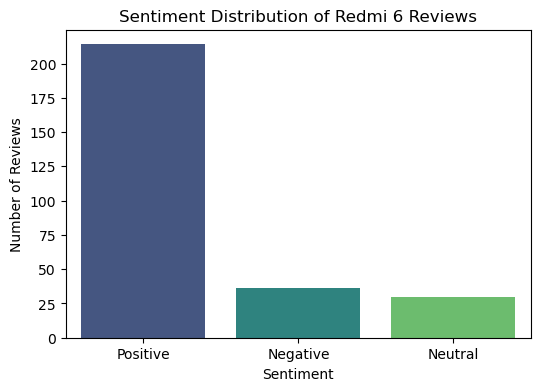

In [23]:
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution of Redmi 6 Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

In [25]:
# 6. WordCloud for Positive & Negative Reviews
positive_text = " ".join(df[df['Sentiment']=='Positive']['Comments'])
negative_text = " ".join(df[df['Sentiment']=='Negative']['Comments'])


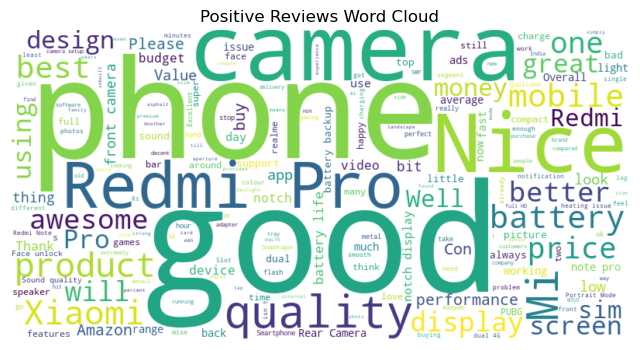

In [26]:
plt.figure(figsize=(8,6))
wc_pos = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color="white").generate(positive_text)
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Reviews Word Cloud")
plt.show()


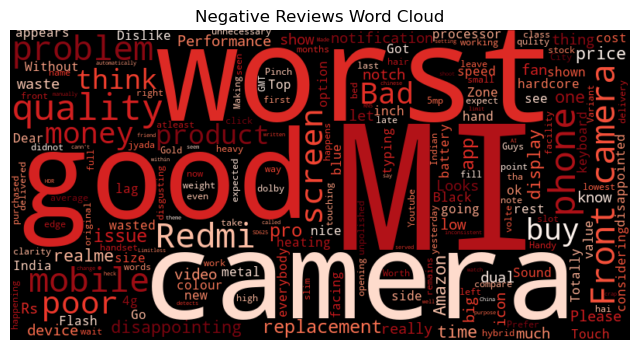

In [27]:
plt.figure(figsize=(8,6))
wc_neg = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color="black", colormap="Reds").generate(negative_text)
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Reviews Word Cloud")
plt.show()

In [29]:
df.to_csv("redmi6_sentiment_results.csv", index=False)
print("\n✅ Sentiment analysis complete! Results saved to 'redmi6_sentiment_results.csv'")


✅ Sentiment analysis complete! Results saved to 'redmi6_sentiment_results.csv'
